# **Data Cleaning and Transformation of FIFA 24 Player Stats Dataset**

### *By: Irfansyah Aswaly*

## **1. Introduction**

The FIFA 24 Player Stats Dataset contains detailed information about football players from around the world, including attributes such as age, height, weight, and performance metrics like dribbling, passing, and shooting skills. This dataset is a valuable resource for various analyses in football, but before diving into insights or predictive modeling, it's essential to ensure the data is clean, consistent, and well-structured.

Data cleaning and transformation are crucial first steps in any data analysis process. This phase involves handling missing values, correcting data types, transforming certain features (such as converting player values from text to numeric formats), and ensuring that the dataset is ready for further analysis or modeling.

In this project, we will focus on:

- **Handling missing values**: Identifying and addressing any missing or null data points.
- **Data type conversion**: Ensuring numerical columns are in the correct format for analysis.
- **Standardizing column names**: Making sure column names are clear, consistent, and ready for further manipulation.
- **Feature engineering**: Modifying or creating new features that will help in better analysis.

By performing these tasks, we will transform the raw dataset into a clean, structured version, allowing for more meaningful analysis and the creation of valuable insights.

## **2. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **3. Load Dataset**

In [7]:
df = pd.read_csv('male_players.csv', low_memory=False)
# Display the first 5 rows of the dataset
df.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


## **4. Exploratory Data Analysis (EDA)**

### **4.1 Basic Information**

In [8]:
# Displaying basic information about the dataset
df.info()

# Descriptive statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,180021.000000,180021.000000,180021.0,180021.000000,180021.000000,1.778680e+05,178173.00000,180021.000000,180021.000000,180021.000000,...,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,20024.000000
mean,217326.670294,19.621450,2.0,65.712711,70.779581,2.379142e+06,10638.01081,25.138689,181.287061,75.233356,...,57.837807,45.851456,47.759511,45.764783,16.509979,16.260136,16.129902,16.276951,16.615517,38.750300
std,35215.749284,2.838621,0.0,7.018104,6.255569,6.184358e+06,21637.41400,4.679389,6.764179,6.999181,...,12.305995,20.452502,21.309061,20.899683,17.661659,16.846583,16.499513,17.009393,17.971201,10.578237
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.00000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,200759.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.00000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,30.000000
50%,222734.000000,20.000000,2.0,66.000000,71.000000,7.500000e+05,4000.00000,25.000000,181.000000,75.000000,...,59.000000,51.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,40.000000
75%,239858.000000,22.000000,2.0,70.000000,75.000000,1.800000e+06,10000.00000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,46.000000
max,278145.000000,24.000000,2.0,94.000000,95.000000,1.940000e+08,575000.00000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.000000,92.000000,95.000000,92.000000,94.000000,68.000000


### **4.2 Check for Missing Values**

In [9]:
# Check for missing values
df.isnull().sum()


player_id       0
player_url      0
fifa_version    0
fifa_update     0
update_as_of    0
               ..
lcb             0
cb              0
rcb             0
rb              0
gk              0
Length: 109, dtype: int64

## **5. Data Pre-Processing**

### **5.1 Handle Missing Data**

In [10]:
# Option 1: Drop rows with missing values
df.dropna(inplace=True)

# Option 2: Fill missing values with the mean (example for 'Height')
# df['Height'].fillna(df['Height'].mean(), inplace=True)

### **5.2 Convert Value Column to Numeric**

In [15]:
# Remove the currency symbol and commas from 'value_eur' column, then convert to numeric
df['value_eur'] = df['value_eur'].replace({'€': '', ',': ''}, regex=True)
df['value_eur'] = pd.to_numeric(df['value_eur'], errors='coerce')

# Check the conversion
df['value_eur'].head()

Series([], Name: value_eur, dtype: float64)

### **5.3 One-Hot Encoding for Categorical Variables**

In [17]:
# Make sure the column to be converted to one-hot encoding is in the DataFrame
if 'nationality_name' in df.columns and 'club_name' in df.columns:
    df = pd.get_dummies(df, columns=['nationality_name', 'club_name'], drop_first=True)
else:
    print("Column 'nationality_name' or 'club_name' not found in DataFrame")

# Display the first few rows to ensure the transformation was successful
df.head()

Column 'nationality_name' or 'club_name' not found in DataFrame


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk


## **6. Feature Engineering**

### **6.1 Create New Feature: Player Efficiency**

In [28]:
# Created a new feature 'Player Efficiency' as an average of ball control, dribbling and finishing
df['Player Efficiency'] = (df['skill_ball_control'] + df['skill_dribbling'] + df['attacking_finishing']) / 3

# Display the results for the first few rows
print(df[['long_name', 'Player Efficiency']].head())

                        long_name  Player Efficiency
0            Kylian Mbappé Lottin          93.000000
1            Erling Braut Haaland          85.666667
2                 Kevin De Bruyne          87.666667
3  Lionel Andrés Messi Cuccittini          92.666667
4                   Karim Benzema          89.666667


## **7. Data Visualization**

### **7.1 Distribution of Player Value**

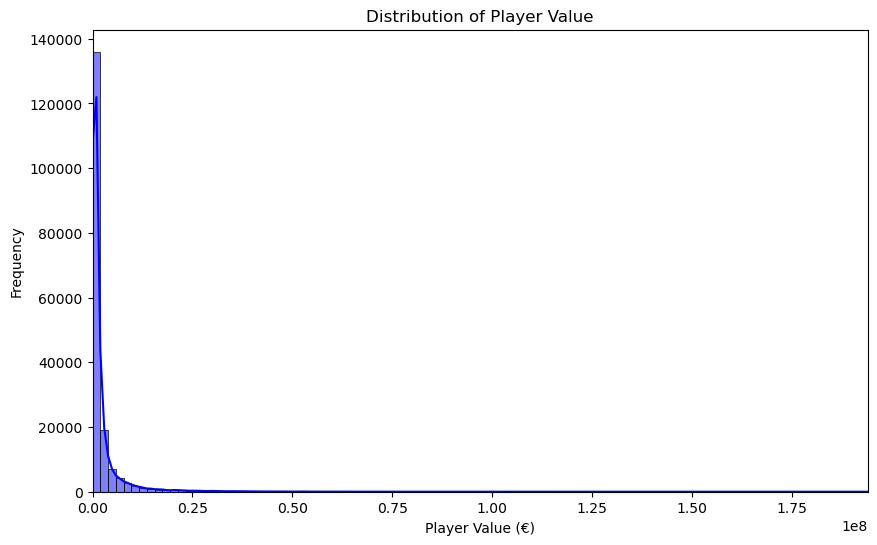

In [32]:
# Visualization of player value distribution
plt.figure(figsize=(10, 6))

# Increase the number of bins for smoother distribution
sns.histplot(df['value_eur'], kde=True, color='blue', bins=100)

# Adjust the X-axis limits if necessary
plt.xlim(0, df['value_eur'].max())  # Adjusts the X axis to the data range

plt.title('Distribution of Player Value')
plt.xlabel('Player Value (€)')
plt.ylabel('Frequency')
plt.show()

### **7.2 Age vs. Player Value**

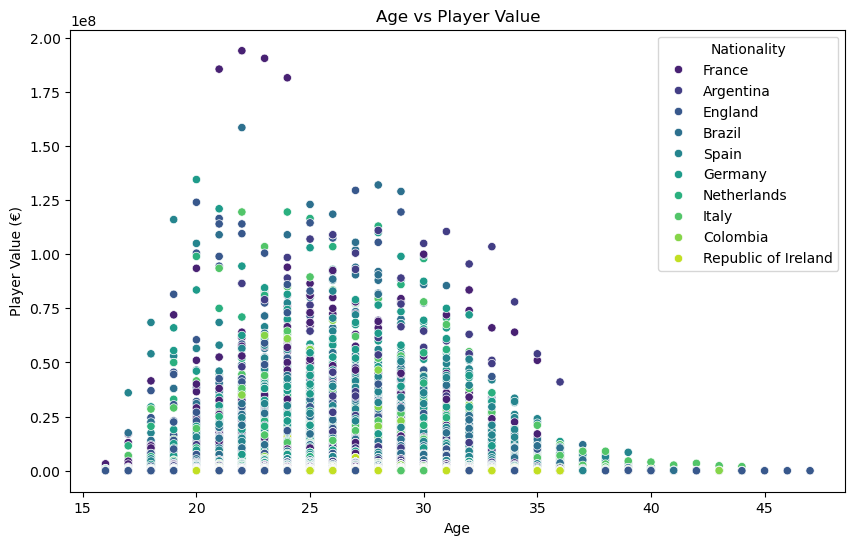

In [35]:
# Scatter plot: Age vs Player Value with selection limited to a few countries
top_countries = df['nationality_name'].value_counts().nlargest(10).index  # Displays the 10 most countries
filtered_df = df[df['nationality_name'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='value_eur', data=filtered_df, hue='nationality_name', palette='viridis')
plt.title('Age vs Player Value')
plt.xlabel('Age')
plt.ylabel('Player Value (€)')
plt.legend(title='Nationality', loc='upper right', bbox_to_anchor=(1, 1))  # Fixed legend position
plt.show()

## **8. Save Cleaned Data**

In [36]:
# Save the cleaned and transformed dataset to a new CSV file
df.to_csv('cleaned_player_stats.csv', index=False)

print("Data saved as 'cleaned_player_stats.csv'")

Data saved as 'cleaned_player_stats.csv'


## **9. Advanced Analysis Regression Model: Predicting Player Value**

In [38]:
# Replace NaN values with the mean of the column
df['value_eur'] = df['value_eur'].fillna(df['value_eur'].mean())

# Repeat the same for other columns if necessary
df['age'] = df['age'].fillna(df['age'].mean())
df['skill_ball_control'] = df['skill_ball_control'].fillna(df['skill_ball_control'].mean())
df['skill_dribbling'] = df['skill_dribbling'].fillna(df['skill_dribbling'].mean())
df['attacking_finishing'] = df['attacking_finishing'].fillna(df['attacking_finishing'].mean())

# Define the features and target
X = df[['age', 'skill_ball_control', 'skill_dribbling', 'attacking_finishing']]
y = df['value_eur']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'R^2 score: {score}')

R^2 score: 0.07733783153280738


## **10. Conclusion**

1. **Player Value Distribution**:
   - The histogram shows a **high frequency of lower player values**, with a slight decline toward the higher value range. This indicates that **most players have lower values**, with only a few players having exceptionally high values.

2. **Age vs Player Value**:
   - The scatter plot indicates that players in the **20-25 age range tend to have higher and more expensive values**, with a significant concentration of data points towards the upper end of the value spectrum. This suggests that players in this age group are likely in their peak performance years and are highly valued by clubs.

3. **Nationality and Club Influence**:
   - Out of the top 10 nationalities, **7 are from Europe and 3 from Latin America**. This suggests that **European players dominate the higher-value players**, reflecting the stronger and more developed football leagues in Europe, as well as the cultural influence of football in these regions.

4. **Model Performance (R^2 Score)**:
   - The linear regression model used to predict player value based on features such as age, ball control, dribbling, and finishing has an **R^2 score of 0.0773**. This low R^2 score indicates that the model is not able to explain much of the variation in player value, implying that there are **other factors not captured by the model** that significantly influence player value.